<a href="https://colab.research.google.com/github/denisecammarota/qbio2021/blob/main/Data_ForFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import scipy as sc
import scipy.integrate as intg
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import loguniform
from scipy.integrate import odeint
sns.set_style('darkgrid')

rng = np.random.default_rng(seed=3141592)

# Auxiliary functions

In [11]:
def scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f):
    b=eta1*(M**nu1)
    K=eta2*(M**nu2)
    A=eta3*(M**nu3)
    C=f*K
    m=eta4*(M**nu4)
    return b,K,A,C,m

In [12]:
def completeLV(t, X, K, A, C, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K )*(X/(X+C)) - m * X

def completeLV_2(X,t, K, A, C, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K )*(X/(X+C)) - m * X

def completeLV_noAllee(X,t, K, A, C, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K ) - m * X

# Mass vector determination

In [13]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
min_m = 0.5
max_m = 15
aux_N = 100
M = loguniform.rvs(min_m, max_m, size=aux_N)
#saving the masses, which will be the same always
np.savetxt("masses.csv", M, delimiter=",")

# GLV with Allee (both interaction not zero and Allee)

## Stochastic with A = 0.1

In [14]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=0.1 #here the a coefficient
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.001

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

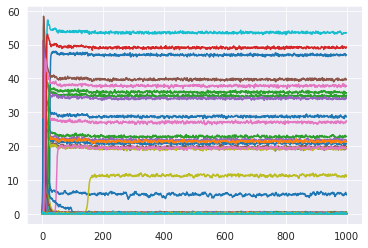

In [15]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()

In [16]:
np.savetxt("gLV_Allee_0p1.csv", total_sol, delimiter=",")
np.savetxt("gLV_Allee_0p1_time.csv", time, delimiter=",")

## Stochastic with A = 0.5

In [17]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=0.5 #here the a coefficient
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.001

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

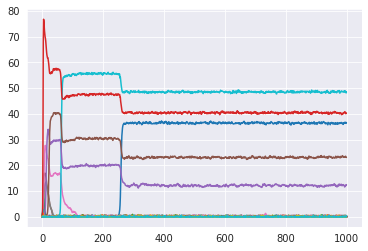

In [18]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()

In [19]:
np.savetxt("gLV_Allee_0p5.csv", total_sol, delimiter=",")
np.savetxt("gLV_Allee_0p5_time.csv", time, delimiter=",")

## Stochastic with A = 1

In [20]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=1 #here the a coefficient
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.001

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

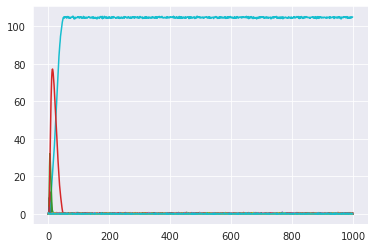

In [21]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()

In [22]:
np.savetxt("gLV_Allee_1p0.csv", total_sol, delimiter=",")
np.savetxt("gLV_Allee_1p0_time.csv", time, delimiter=",")

## Stochastic and Forcing with A = 0.1

In [63]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=0.01 #here the a coefficient
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.0011

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

In [97]:
def scaling_K_time(M,eta2,nu2,t):
  return (eta2+ 95*np.sin(t*np.pi*2/365))*(M**nu2)

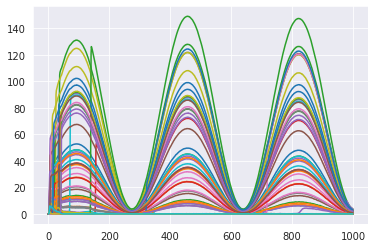

In [104]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 5e-2
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  aux_K =  scaling_K_time(M,eta2,nu2,tmp_time[0])
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()

In [105]:
np.savetxt("gLV_Allee_0p1_forcing.csv", total_sol, delimiter=",")
np.savetxt("gLV_Allee_0p1_time_forcing.csv", time, delimiter=",")

# GLV without Allee (only interaction, no Allee)

## Stochastic with A = 0.1

In [ ]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=0.1 #here the a coefficient
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.0

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

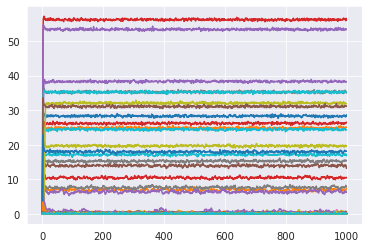

In [ ]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_noAllee,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()

In [ ]:
np.savetxt("gLV_0p1.csv", total_sol, delimiter=",")
np.savetxt("gLV_0p1_time.csv", time, delimiter=",")

## Stochastic with A = 0.5

In [ ]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=0.5 #here the a coefficient
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.0

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

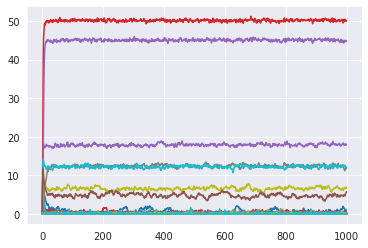

In [ ]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_noAllee,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()

In [ ]:
np.savetxt("gLV_0p5.csv", total_sol, delimiter=",")
np.savetxt("gLV_0p5_time.csv", time, delimiter=",")

## Stochastic with A = 1

In [ ]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=1.0 #here the a coefficient
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.0

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

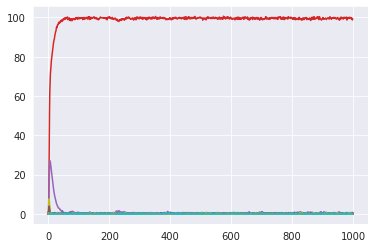

In [ ]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_noAllee,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()

In [ ]:
np.savetxt("gLV_1p0.csv", total_sol, delimiter=",")
np.savetxt("gLV_1p0_time.csv", time, delimiter=",")

# Logistic with Allee (no interaction A = 0, with Allee)

In [ ]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=0.0 #here the a coefficient
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.001

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

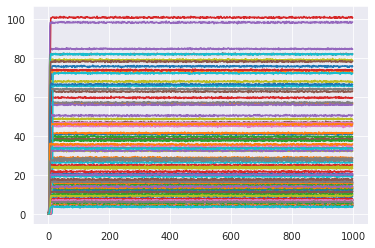

In [ ]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_2,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()

In [ ]:
np.savetxt("Logistic_Allee_0p0.csv", total_sol, delimiter=",")
np.savetxt("Logistic_Allee_0p0_time.csv", time, delimiter=",")

# Logistic without Allee (no interaction A = 0, no Allee)

In [ ]:
#first we create mass vector
#https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python
#scaling parameters 
#birth rate ok
eta1=5.37
nu1=-0.25
#carrying capacity ok
eta2=100
nu2=-1
#alpha, competition matrix off diagonal
eta3=0.0 #here the a coefficient
nu3=0
#death rate ok
eta4=2.5
nu4=-0.25
#fraction for C ok
f=0.0

#now we get the matrices for the simulation
b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)
#we put together the matrices
aux_b = np.copy(b)
aux_K = np.copy(K)
aux_m = np.copy(m)
aux_A = np.zeros((aux_N, aux_N))+A[0]
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())
aux_C = np.copy(C)

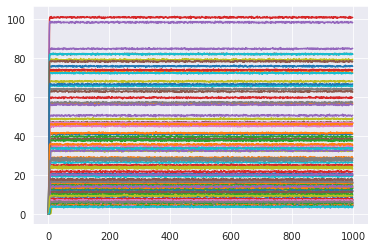

In [ ]:
time = np.linspace(0,1e3,int(1e3))
total_sol = np.zeros((time.shape[0],aux_N))
sigma = 2e-1
y0 = rng.uniform(0,0.1,size=aux_N)
total_sol[0] = y0
for i in range(time.shape[0]-1):
  tmp_time = time[i:i+2]
  tmp_sol = odeint(completeLV_noAllee,y0,tmp_time, args=(aux_K, aux_A, aux_C, aux_b, aux_m))
  tmp_sol[-1] += rng.normal(0,sigma,tmp_sol[-1].shape)
  total_sol[i+1] = tmp_sol[-1]
  total_sol[total_sol<1e-3] = 1e-3
  y0 = tmp_sol[-1]
plt.plot(total_sol)
plt.show()

In [ ]:
np.savetxt("Logistic_0p0.csv", total_sol, delimiter=",")
np.savetxt("Logistic_0p0_time.csv", time, delimiter=",")